# Import the needed Libraries

In [80]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from scipy.stats import zscore
import subprocess
import scipy.stats as stats
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from pandas.api.types import CategoricalDtype

# Reading the dataset

In [81]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TIMSS2019.xlsx')

make a copy of dataframe

In [82]:
df1 = df.copy()

# Explore in Data


In [83]:
df1.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,finalscore,totalscore,finalscorealgebra,finalscoredat,finalscoregeo,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,364,1,5001,500104,50010404,D,14.0,A,D,E,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,364,1,5001,500104,50010418,D,11.0,D,D,E,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,364,1,5001,500104,50010432,B,31.0,B,D,C,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,364,1,5002,500201,50020114,E,6.0,D,E,E,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,364,1,5002,500201,50020128,D,15.0,D,C,E,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Columns: 338 entries, IDCNTRY to BTDMDAT
dtypes: float64(123), int64(210), object(5)
memory usage: 15.4+ MB


In [85]:
df1.describe()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,totalscore,BSBG01,BSBG03,BSBG04,BSBG05A,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
count,5980.0,5980.000000,5980.000000,5980.000000,5.980000e+03,5980.000000,5979.000000,5979.000000,5979.000000,5979.000000,...,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000
mean,364.0,7.511371,5111.388127,511140.704682,5.111409e+07,11.534551,1.508279,1.790266,2.312260,1.287506,...,3.332274,2.511204,2.061873,1.477592,1.481605,2.160535,102.876645,43.618234,90.049831,68.932218
std,0.0,4.036591,62.831454,6283.111923,6.283112e+05,7.238191,0.499973,1.060167,1.226452,0.710385,...,1.365769,0.583868,0.517159,0.577784,0.645203,1.059201,65.127278,71.818927,67.741639,73.962196
min,364.0,1.000000,5001.000000,500104.000000,5.001040e+07,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,66.666670,0.000000,16.666670,0.000000
25%,364.0,4.000000,5056.000000,505602.000000,5.056021e+07,6.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,100.000000,28.571430,83.333330,50.000000
50%,364.0,7.500000,5113.000000,511303.000000,5.113033e+07,10.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,2.000000,100.000000,42.857140,83.333330,66.666670
75%,364.0,11.000000,5164.000000,516403.000000,5.164034e+07,15.000000,2.000000,3.000000,3.000000,1.500000,...,5.000000,3.000000,2.000000,2.000000,2.000000,3.000000,100.000000,42.857140,100.000000,83.333330
max,364.0,14.000000,5220.000000,522001.000000,5.220013e+07,39.000000,2.000000,9.000000,9.000000,9.000000,...,5.000000,3.000000,3.000000,3.000000,3.000000,9.000000,999.000000,999.000000,999.000000,999.000000


investigate the unique entries on some of the qualitative data

In [86]:
df1['finalscore'].unique()

array(['D', 'B', 'E', 'C', 'A', nan], dtype=object)

make a list to drop all columns that are empty or only contain one unqiue value


In [87]:
dff = list(df1.columns[df1.isna().all()])+list(df1.columns[df1.nunique()==1])
dff

['BSBGSEC', 'BSDGSEC', 'IDCNTRY']

graph the different counts of gender in the dataset


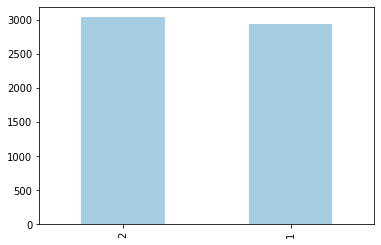

In [88]:
# 1 as female and 2 as male
df1['ITSEX'].value_counts().plot(kind='bar', stacked=True , colormap='Paired');

# Preprocessing

#### removing null values

check if we have any null or nan values

In [89]:
nulls=df1.columns[df1.isna().any()]
df1[nulls].isna().sum()

finalscore              5
finalscorealgebra      18
finalscoredat          30
finalscoregeo          25
finalscorenum           7
                     ... 
BSDGSVM                 1
BSBGSEC              5980
BSDGSEC              5980
BSDG05S                 1
BSDGEDUP                1
Length: 121, dtype: int64

all the values in "BSBGSEC" and "*BSDGSEC*" are null so we drop them

In [90]:
df1 = df1.drop(columns=[ 'BSBGSEC', 'BSDGSEC'])

remove other null values in remaining rows

In [91]:
df1 = df1.dropna()

#### removing redundant students

In [92]:
df1 = df1.drop_duplicates(subset=['IDSCHOOL' , 'IDSTUD'], keep='first' , inplace=False,)

#### make sure that all of the students are iranian

In [93]:
df1 = df1.loc[df['IDCNTRY'] == 364]

#### removing unused columns
*   ID columns are bad for making decision tree duo to the hight entropy
*   total score has the same result as (IDBOOK + finalscore)






In [94]:
df1 = df1.drop(columns=['IDSTUD', 'IDCNTRY', 'IDSCHOOL', 'IDCLASS', 'IDBOOK', 'totalscore',])

In [95]:
df1.head()

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,D,A,D,E,E,1.0,2.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,D,D,D,E,D,1.0,1.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,B,B,D,C,B,1.0,1.0,4.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,E,D,E,E,E,1.0,1.0,2.0,2.0,2.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,D,D,C,E,D,1.0,1.0,2.0,1.0,1.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667


#### replace all the a/b/c/d/e values with numbers so we can use them in our *analysis*

In [96]:
df1 = df1.replace(['A', 'B', 'C', 'D', 'E'], [5, 4, 3, 2, 1])

In [97]:
df1

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,2,3,3,1,1,2,100.0,28.57143,100.00000,83.33333
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,5,3,2,2,1,2,100.0,71.42857,100.00000,83.33333
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,4,3,3,2,3,2,100.0,14.28571,83.33333,66.66667


removing correlated features such as BSBG01 and ITSEX, both of them show the same things

using corr() function to Compute pairwise correlation of columns, excluding NA/null values.

and the method is spearman : Spearman rank correlation

In [98]:
correlation = df1.corr(method="spearman" )
corrlist = []

#all the columns except finalscores columns that have coefficient upto 0.5
for i in correlation.columns:
  if i not in (['finalscore', 'finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum'] + corrlist):
    temp = correlation[i]
    temp = temp[abs(temp) >= 0.5]
    temp = temp[temp.index != i]

    for column in list(temp.index):
      if column not in corrlist:
        corrlist.append(column)
df2 = df1.copy()
#remove all the correlated columns and just keeps on of them
df1 = df1.drop(columns = corrlist)

as you can see only remains 206 columns out of 338

In [99]:
df1

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM22BA,BTBM22AC,BTBM22AD,BTBM22BD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM22BG,BTBM23,BTDMNUM
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,1,2,2,1,1,1,2,9,5,100.0
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,2,2,2,1,2,2,2,2,4,100.0
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,2,2,2,1,2,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,1,2,1,1,2,2,2,1,2,100.0
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,2,1,1,1,1,1,1,1,5,100.0
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,2,1,1,1,1,1,1,1,5,100.0
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,2,2,2,1,1,1,1,2,4,100.0


#### invalid and omitted values

in our dataframe we have some invalid or omitted values that fill with 9 or 99 ... or 999999

first the wall let's check how many omitted values are in each columns

In [100]:
# make an invalid list of items contain the name of the columns and append total omitted values 
invalidlist = []

for i in df1.columns:
   invalidlist.append((i, len(df1[df1[i]==9])))

# sort invalidlist to have a better view
invalidlist.sort(key = lambda x: x[1]) 
invalidlist

[('finalscore', 0),
 ('finalscorealgebra', 0),
 ('finalscoredat', 0),
 ('finalscoregeo', 0),
 ('finalscorenum', 0),
 ('BSBG01', 0),
 ('BSDAGE', 0),
 ('BCBG04', 0),
 ('BCBG05A', 0),
 ('BCBG06A', 0),
 ('BCBG06B', 0),
 ('BCBG06C', 0),
 ('BCBG09', 0),
 ('BCBG10A', 0),
 ('BCBG12', 0),
 ('BCBG13AA', 0),
 ('BCBG13AG', 0),
 ('BCBG13BC', 0),
 ('BCBG14A', 0),
 ('BCBG14C', 0),
 ('BCBG14G', 0),
 ('BCBG14I', 0),
 ('BCBG14K', 0),
 ('BCBG15A', 0),
 ('BCBG15C', 0),
 ('BCBG15D', 0),
 ('BCBG15G', 0),
 ('BCBG15H', 0),
 ('BCBG16C', 0),
 ('BCBG17A', 0),
 ('BCBG20', 0),
 ('BCDGMRS', 0),
 ('BTBG04', 0),
 ('BTBG05F', 0),
 ('BTBG05G', 0),
 ('BTBG05H', 0),
 ('BTBG07A', 0),
 ('BTBG07D', 0),
 ('BTBG07H', 0),
 ('BTBG08A', 0),
 ('BTBG09F', 0),
 ('BTBG09G', 0),
 ('BTBG09H', 0),
 ('BTBG11', 0),
 ('BTBG13A', 0),
 ('BTBG13B', 0),
 ('BTBG13C', 0),
 ('BTBG13D', 0),
 ('BTBG13H', 0),
 ('BTBM14', 0),
 ('BTBM15A', 0),
 ('BTBM15C', 0),
 ('BTBM15D', 0),
 ('BTBM15F', 0),
 ('BTBM16', 0),
 ('BTBM17A', 0),
 ('BTBM19CA', 0),
 ('BTB

it's not really reasonable to remove all the columns with omitted values. sometimes thay are useful so it's just better to remove the columns with high number of omitted value for example up to 300

In [101]:
df1 = df1.drop(columns=['BSBM27AA', 'BSBM27BA', 'BCBG21C' ,'BCBG03B' , 'BSBM26BA', 'BTBM22BG', 'BSBM26AA', 'BTBM22BD', 'BCBG18','BTBM22BA'])

#### the finall Preprocessed dataframe

In [102]:
df1

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM20E,BTBM21,BTBM22AA,BTBM22AC,BTBM22AD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM23,BTDMNUM
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,3,5,1,2,2,1,1,2,5,100.0
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,3,3,2,2,2,2,2,2,4,100.0
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,3,3,2,2,2,2,2,2,4,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,...,3,5,2,2,1,2,2,2,2,100.0
5976,2,1,1,3,1,1.0,4.0,1.0,2.0,1.0,...,3,5,1,1,1,1,1,1,5,100.0
5977,1,1,1,2,1,1.0,3.0,2.0,1.0,2.0,...,3,5,1,1,1,1,1,1,5,100.0
5978,2,1,1,3,1,2.0,1.0,5.0,1.0,1.0,...,2,5,1,2,2,1,1,1,4,100.0


visualize the relationships between a selection of the available scores for student demographics (1000 randomly sampled students, 6 random sampled variables)


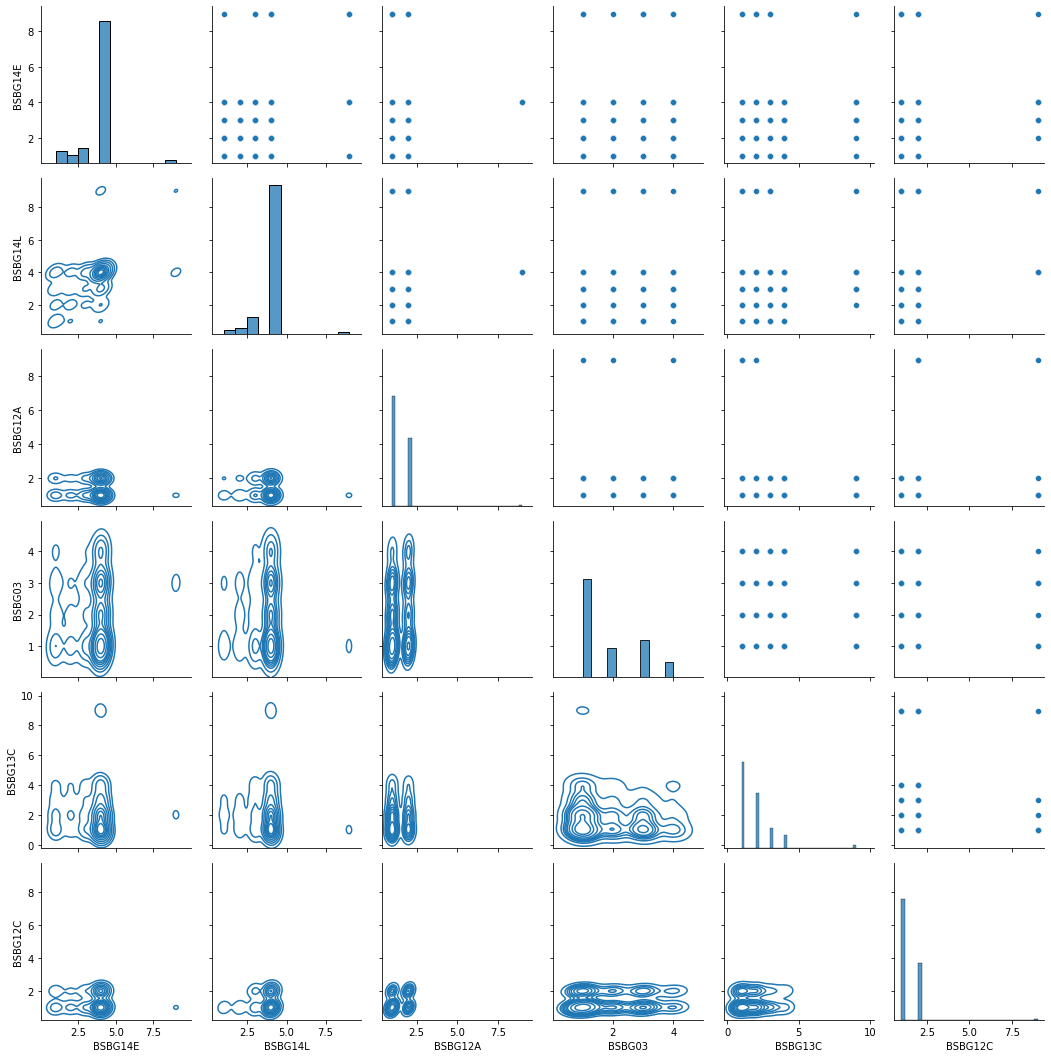

In [103]:
g = sns.PairGrid(df1.sample(1000).loc[:,random.sample([col for col in df1.columns if 'BSBG' in col and df1[col].dtype == 'float64'],6)])

# upper graphs will show correlation
g.map_upper(sns.scatterplot)

# lower graphs will show data concentration
g.map_lower(sns.kdeplot)

# diagonal graphs will show the distribution of each variable
g.map_diag(sns.histplot);

create an ordinal categorical variable for the age of the teacher


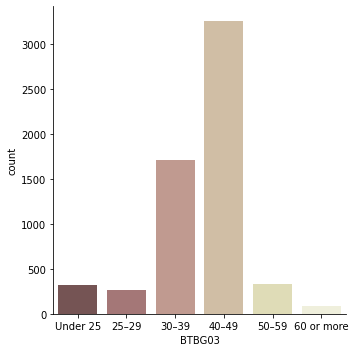

In [104]:
# graph the age distribution of  teachers in the data
g =sns.catplot(x='BTBG03', kind='count', palette='pink', data=df);
g.set_xticklabels(["Under 25", "25–29", "30–39" ,'40–49', '50–59', '60 or more'])

gender distribution of teachers

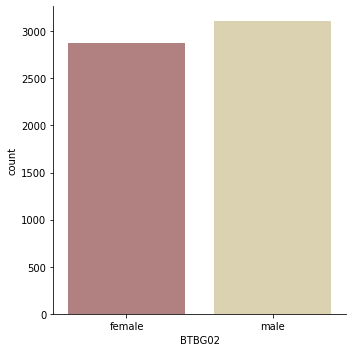

In [105]:
# graph the gender distribution of teachers in the data
c = sns.catplot(x='BTBG02', kind='count', palette='pink', data=df);
c.set_xticklabels(["female", "male",])

# Normalization

Normalization is an essential part of product information management, preventing data from being replicated in two tables at the same time or unrelated product data being gathered together in the same table. In addition, normalization helps to streamline your data, simplifying your database and making it more concise.

Z score:

If a value is exactly equal to the mean of all the values of the feature, it will be normalized to 0. If it is below the mean, it will be a negative number, and if it is above the mean it will be a positive number.

In [106]:
def z_score(df):
    df_std = df.copy()
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

just to show how it will work

In [107]:
normal_df = z_score(df1)

In [108]:
normal_df

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM20E,BTBM21,BTBM22AA,BTBM22AC,BTBM22AD,BTBM22AE,BTBM22AF,BTBM22AG,BTBM23,BTDMNUM
0,-0.038112,2.534132,-0.063539,-0.665190,-0.787896,-1.012983,0.200939,0.559222,-0.403291,-0.497422,...,0.384378,0.494899,-0.473608,0.218129,0.589478,-0.727705,-0.707353,0.535028,1.218847,-0.0447
1,-0.038112,-0.136591,-0.063539,-0.665190,0.460237,-1.012983,-0.743412,0.559222,-0.403291,-0.497422,...,0.384378,0.494899,-0.473608,0.218129,0.589478,-0.727705,-0.707353,0.535028,1.218847,-0.0447
2,1.936063,1.643891,-0.063539,1.782989,2.956502,-1.012983,-0.743412,1.374748,-0.403291,-0.497422,...,0.384378,0.494899,-0.473608,0.218129,0.589478,-0.727705,-0.707353,0.535028,1.218847,-0.0447
3,-1.025200,-0.136591,-0.998644,-0.665190,-0.787896,-1.012983,-0.743412,-0.256304,1.001243,0.766592,...,0.384378,-1.601704,0.479878,0.218129,0.589478,0.288546,0.309446,0.535028,0.486502,-0.0447
4,-0.038112,-0.136591,0.871567,-0.665190,0.460237,-1.012983,-0.743412,-0.256304,-0.403291,-0.497422,...,0.384378,-1.601704,0.479878,0.218129,0.589478,0.288546,0.309446,0.535028,0.486502,-0.0447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,-0.038112,-0.136591,-0.063539,0.558900,0.460237,0.987017,0.200939,-0.256304,1.001243,0.766592,...,0.384378,0.494899,0.479878,0.218129,-0.786435,0.288546,0.309446,0.535028,-0.978189,-0.0447
5976,-0.038112,-1.026832,-0.998644,1.782989,-0.787896,-1.012983,2.089643,-1.071831,1.001243,-0.497422,...,0.384378,0.494899,-0.473608,-0.578008,-0.786435,-0.727705,-0.707353,-0.851276,1.218847,-0.0447
5977,-1.025200,-1.026832,-0.998644,0.558900,-0.787896,-1.012983,1.145291,-0.256304,-0.403291,0.766592,...,0.384378,0.494899,-0.473608,-0.578008,-0.786435,-0.727705,-0.707353,-0.851276,1.218847,-0.0447
5978,-0.038112,-1.026832,-0.998644,1.782989,-0.787896,0.987017,-0.743412,2.190274,-0.403291,-0.497422,...,-0.565911,0.494899,-0.473608,0.218129,0.589478,-0.727705,-0.707353,-0.851276,0.486502,-0.0447


# Analysis

## Decision tree:

A decision tree is a model composed of a collection of "questions" organized hierarchically in the shape of a tree. The questions are usually called a condition, a split, or a test. We will use the term "condition" in this class. Each non-leaf node contains a condition, and each leaf node contains a prediction.

In [109]:
# using DesicionTree in scikit_learn.tree library
def desicion_tree(dataframe, target_column, unnecessary_columns):
  temp = dataframe.nunique().sort_values(ascending=False)

  # remove features with distinct value more than 8
  temp = temp[temp>8]
  not_unique_attributes = list(temp.keys())
  print("\nfeatures with more than 8 unique values:", not_unique_attributes)

  # "y" is the feature that we want to analys
  y = dataframe[target_column]
  X = dataframe.drop(columns = not_unique_attributes + [target_column]+ unnecessary_columns)
  print("\nafter remove extra features: \n", X.nunique().sort_values(ascending=False))

  dt = DecisionTreeClassifier()
  dt.fit(X, y)

  print("\nthe most important features (features on top of the tree): ")

  # inorder to dimension reduction, we use features betwean depths 0 to 20
  # but thay are useful in correlation analysis so we retrieve them back
  best_attributes = pd.DataFrame(dt.feature_importances_, 
                                 index = X.columns, 
                                 columns=['importance']).sort_values('importance',
                                                                     ascending=False).head(20)
  print(best_attributes)
  return not_unique_attributes, list(best_attributes.index)

## Correlation

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation, or a direct relationship. A correlation coefficient of 0 means there is no linear relationship.

In [110]:
def correlation_analysis(dataframe, target_column):
  corr_results = []
  
  for i in dataframe.columns:
    if i != target_column:
      temp = dataframe[[target_column, i]]
      feature_max = max(temp[i])

      # removing the ommited or invalid values
      if feature_max in [9, 99, 999, 9999, 99999, 999999]:
        temp = temp[temp[i]<feature_max]
      #normalizatoin  
      temp = z_score(temp)
      #compute the correlation coefficient with target feature
      corr_results.append((i, temp.corr()[target_column][i]))

  corr_results.sort(key = lambda x: x[1]) 
  return corr_results

this function plot the relation between two feature

we plot one pair for instance

In [134]:
def plot_relation(dataframe, x, y):
  df = dataframe[[x, y]]
  feature_max = max(df[x])
  if feature_max in [9, 99, 999, 9999, 99999, 999999]:
    df = df[df[x]<feature_max]
  df = df.groupby(x).mean()
  print("\nthe relation between", y, "with", x,': ')
  df.plot(y = y, kind='line' , color  = "pink" ,  markersize=7 )
  plt.show()

for instance the relation betwen geoscore and lack of sleep


the relation between BTBG13C with finalscoregeo : 


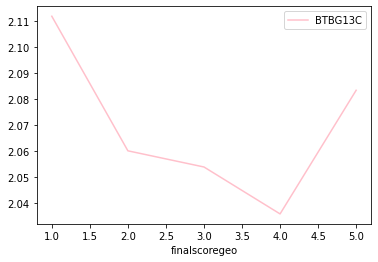

In [135]:
# geo score
# GEN\LIMIT TEACHING\LACK OF SLEEP
plot_relation(df1, 'finalscoregeo' , 'BTBG13C')

### Q1: the most importent context that affect the iranian student's finalscore?

best and more important features are near the root of the tree

In [113]:
# we ain't need the four columns['finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum'] duo to their high correlatin score
# and the target_column is "finalscore"

not_unique_attributes, best_attributes = desicion_tree(df1,
                                                       'finalscore',
                                                       ['finalscorealgebra', 'finalscoredat',	'finalscoregeo', 'finalscorenum']
                                                       )


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.043466
BSBM19B     0.031183
BSDGEDUP    0.026537
BSBM19H     0.020877
BSBM19C     0.020579
BCBG05A     0.017791
BSBM18F     0.017448
BSBG04      0.016930
BSBM19F     0.016844
BSBM15      0.016011
BSBG03      0.015449
BSBM18A     0.015395
BSBG10      0.015132
BSBG13D     0.015131
BSBG11A     0.015099
BSBM17E     0.013508
BSBG11B     0.012993
BSBG13E     0.012908
BSBM18C     0.012844
BSBG14A     0.011610


now that we know our importand features, can make a new dataframe out of them inorder to dimentioan reduction

also need to add the target feature, "finalscore".

In [114]:
Q1df = df1[['finalscore'] + best_attributes + not_unique_attributes]
Q1df.head()

,finalscore,BSBG07,BSBM19B,BSDGEDUP,BSBM19H,BSBM19C,BCBG05A,BSBM18F,BSBG04,BSBM19F,...,BSBM18C,BSBG14A,BSDAGE,BCBG06A,BTBG01,BCBG06B,BTBM14,BCBG07,BTBG11,BSBG06A
0,2,5.0,2.0,2.0,3.0,2.0,1,4.0,3.0,3.0,...,4.0,4.0,13.92,170,27,270,90,3,0,4.0
1,2,4.0,3.0,1.0,1.0,2.0,1,2.0,3.0,2.0,...,4.0,4.0,14.58,170,27,270,90,3,0,6.0
2,4,6.0,4.0,1.0,4.0,4.0,1,2.0,4.0,1.0,...,4.0,3.0,14.42,170,27,270,90,3,0,7.0
3,1,6.0,2.0,4.0,1.0,3.0,2,3.0,2.0,4.0,...,3.0,4.0,13.83,160,15,210,240,0,5,1.0
4,2,3.0,1.0,3.0,4.0,1.0,2,1.0,2.0,4.0,...,1.0,4.0,14.58,160,15,210,240,0,5,2.0


now it's time to pass the Q1df and the target_column to correlation function inorder to find the most correlated features.

we must consider the absolute difference of them so BSDGEDUP, BSBM19H ,BSBG04, BSBM19B will choose

 but we can plot any of the features and analys the corelation between them to finalscore

In [115]:
correlation_analysis(Q1df, 'finalscore')

[('BSDGEDUP', -0.33266606957882655),
 ('BCBG05A', -0.2666288236472384),
 ('BSBM19F', -0.25767695285681735),
 ('BSBM15', -0.21303178097520625),
 ('BSBG03', -0.1645782516900167),
 ('BSDAGE', -0.10218872222579233),
 ('BSBG13E', -0.09827324349329454),
 ('BTBG11', -0.09214366192999246),
 ('BSBG13D', 0.003433186633321043),
 ('BSBM17E', 0.013661308033310077),
 ('BSBG11A', 0.024586407149018993),
 ('BSBM18A', 0.03773356451638398),
 ('BSBG14A', 0.0543733559715198),
 ('BSBG11B', 0.08389415004617272),
 ('BSBM18F', 0.08594176282531707),
 ('BTBG01', 0.08931340303185344),
 ('BCBG06A', 0.10029319943704611),
 ('BSBM18C', 0.10770060707648754),
 ('BTBM14', 0.13640193416856217),
 ('BSBG10', 0.13903538456937095),
 ('BSBG06A', 0.18328758868881992),
 ('BCBG07', 0.18862056265384497),
 ('BCBG06B', 0.21882354096584916),
 ('BSBG07', 0.2757774424406588),
 ('BSBM19C', 0.2840857745061991),
 ('BSBM19B', 0.3330176554128761),
 ('BSBG04', 0.3352625639550429),
 ('BSBM19H', 0.33802508511683543)]

### inverse relationship between finalscore and Parents' Highest Education Level


the relation between finalscore with BSDGEDUP : 


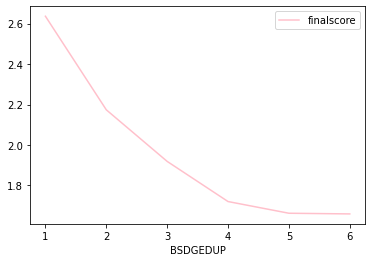

In [116]:
plot_relation(df1, 'BSDGEDUP', 'finalscore')

## direct relationship between finalscore and AGREE MATHEMATICS HARDER FOR ME


the relation between finalscore with BSBM19H : 


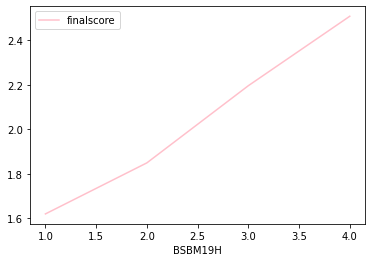

In [117]:
plot_relation(df1, 'BSBM19H', 'finalscore')

## direct relationship between finalscore and AMOUNT OF BOOKS IN YOUR HOME


the relation between finalscore with BSBG04 : 


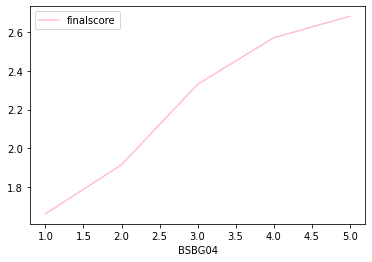

In [118]:
plot_relation(df1, 'BSBG04', 'finalscore')

## Q2: how gender will be important for finalscore?

### for gender analysis:

we will just do the same things in Q1 for male and female students then compare themselves with each other in some features

make a df out of all male and female students separately

In [119]:
# 'BSBG01' shows the sex of students. 1 as female and 2 as male
male_df = df2.loc[df['BSBG01'] == 2]
male_df.head()

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
5,1,2,2,1,1,2.0,4.0,3.0,2.0,2.0,...,2,3,1,1,2,4,100.0,28.57143,100.00000,83.33333
6,1,1,2,1,1,2.0,4.0,2.0,1.0,1.0,...,3,3,2,3,1,4,100.0,42.85714,83.33333,100.00000
7,2,2,1,1,2,2.0,1.0,2.0,1.0,2.0,...,3,3,2,3,1,4,100.0,42.85714,83.33333,100.00000
11,1,2,2,1,1,2.0,2.0,1.0,1.0,1.0,...,4,3,1,1,2,2,100.0,42.85714,83.33333,100.00000
12,2,2,1,1,2,2.0,3.0,3.0,1.0,2.0,...,4,3,1,1,2,2,100.0,42.85714,83.33333,100.00000


In [120]:
# 'BSBG01' shows the sex of students. 1 as female and 2 as male
female_df = df2.loc[df['BSBG01'] == 1]
female_df.head()

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,2,5,2,1,1,1.0,2.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
1,2,2,2,1,2,1.0,1.0,3.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
2,4,4,2,3,4,1.0,1.0,4.0,1.0,1.0,...,5,3,2,1,1,2,100.0,28.57143,83.33333,83.33333
3,1,2,1,1,1,1.0,1.0,2.0,2.0,2.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667
4,2,2,3,1,2,1.0,1.0,2.0,1.0,1.0,...,4,2,2,2,2,3,100.0,28.57143,83.33333,16.66667


not really affect in this feature : Home Educational Resources/IDX


the relation between finalscore with BSBGHER : 


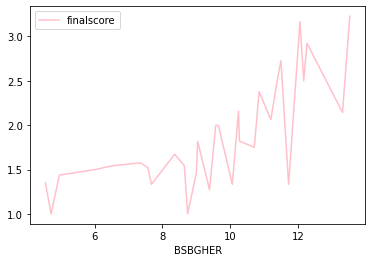


the relation between finalscore with BSBGHER : 


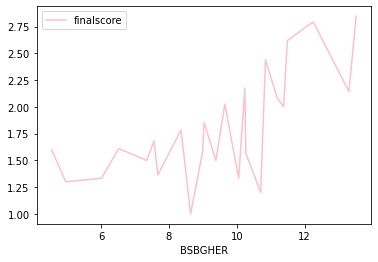

In [121]:
plot_relation(male_df, 'BSBGHER', 'finalscore')
plot_relation(female_df, 'BSBGHER', 'finalscore')

Student Confident in Mathematics/SCL is more important for female than male


the relation between finalscore with BSBGSCM : 


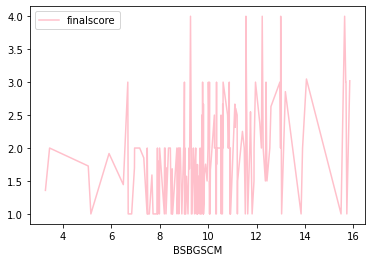


the relation between finalscore with BSBGSCM : 


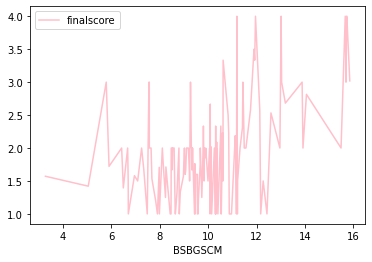

In [122]:
plot_relation(male_df, 'BSBGSCM', 'finalscore')
plot_relation(female_df, 'BSBGSCM', 'finalscore')

PARENTAL SUPPORT is more important for female than male


the relation between finalscore with BCBG14H : 


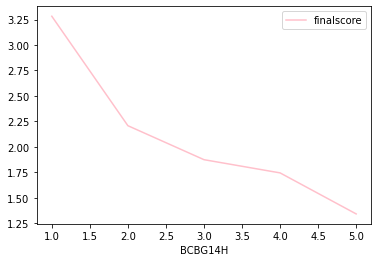


the relation between finalscore with BCBG14H : 


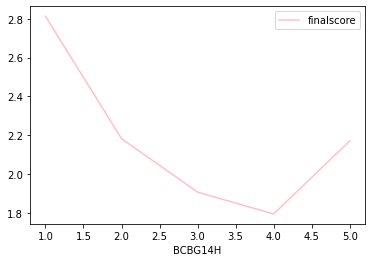

In [123]:
plot_relation(male_df, 'BCBG14H', 'finalscore')
plot_relation(female_df, 'BCBG14H', 'finalscore')

ENCOURAGE STUDENTS is more important for male than female


the relation between finalscore with BCBG15G : 


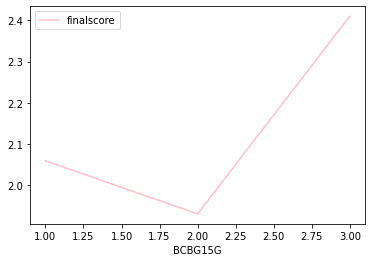


the relation between finalscore with BCBG15G : 


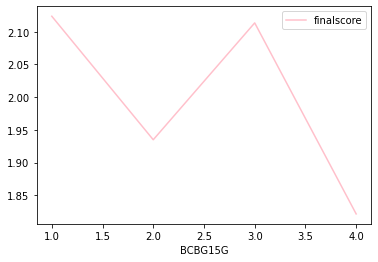

In [124]:
plot_relation(male_df, 'BCBG15G', 'finalscore')
plot_relation(female_df, 'BCBG15G', 'finalscore')

so we assumed that gender is important in some features and not in some of them.


## Q3: how context affect other finalscores?
we need to just do the same thing in Q1 for all the finalscores
* algebra
* dat
* geo
* num

### Algebra:



In [136]:
not_unique_attributes, best_attributes = desicion_tree(df1,
                                                       'finalscorealgebra',
                                                       ['finalscore', 'finalscoredat',	'finalscoregeo', 'finalscorenum']
                                                       )
algebra_df = df1[['finalscorealgebra'] + best_attributes + not_unique_attributes]


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.028349
BSDGEDUP    0.025048
BSBG04      0.024075
BSBM15      0.023851
BSBG11B     0.022389
BSBG11A     0.020780
BSBM16C     0.020396
BSBM18F     0.020299
BSBM19E     0.020294
BSBM19B     0.020144
BSBM19H     0.019133
BSBG13E     0.018356
BSBG13C     0.017364
BSBM19F     0.017022
BSBG10      0.016497
BCBG05A     0.015514
BSBM17E     0.015470
BSBG14B     0.014840
BSBG14D     0.014126
BSBG13A     0.013900


BSBM19H and BSBG04 will choose

In [138]:
correlation_analysis(algebra_df, 'finalscorealgebra')

[('BSDGEDUP', -0.2706372480836301),
 ('BCBG05A', -0.23007794130070885),
 ('BSBM19F', -0.2277770152717095),
 ('BSBM15', -0.17616879235802727),
 ('BSDAGE', -0.09989372810257884),
 ('BSBG13E', -0.09157070953482038),
 ('BTBG11', -0.09023165062822837),
 ('BSBM17E', -0.012302318591844505),
 ('BSBG13C', -0.00010916942781410487),
 ('BSBG13A', 0.006122922926200876),
 ('BSBG11A', 0.03160598039238841),
 ('BTBG01', 0.06096757180479207),
 ('BSBG14B', 0.06145453136360599),
 ('BCBG06A', 0.07021322547468799),
 ('BSBM18F', 0.08260877607156736),
 ('BSBG11B', 0.08661661465609269),
 ('BSBG14D', 0.09245880421584537),
 ('BTBM14', 0.12432600621391635),
 ('BSBG10', 0.12722731624531722),
 ('BSBG06A', 0.15827161827064104),
 ('BSBM16C', 0.16862336353285004),
 ('BCBG07', 0.1709191986208085),
 ('BCBG06B', 0.18176201269870712),
 ('BSBM19E', 0.18616890985751436),
 ('BSBG07', 0.23570303713143753),
 ('BSBM19B', 0.26863822633507545),
 ('BSBG04', 0.2723104929629121),
 ('BSBM19H', 0.27584236152077507)]

### dat:

In [141]:
not_unique_attributes, best_attributes = desicion_tree(df1,
                         
                                                       'finalscoredat',
                                                       ['finalscore', 'finalscorealgebra',	'finalscoregeo', 'finalscorenum']
                                                       )
dat_df = df1[['finalscoredat'] + best_attributes + not_unique_attributes]


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG07      0.025770
BSBG04      0.021225
BSBM15      0.020120
BSDGEDUP    0.018525
BSBG11B     0.017380
BSBM19H     0.017044
BSBM18F     0.016936
BSBG13C     0.016601
BSBG10      0.016174
BSBM18C     0.015986
BSBM16C     0.015569
BSBM18A     0.014620
BSBM19F     0.014331
BSBM20C     0.014279
BSBG13D     0.014268
BSBM19B     0.014089
BSBM19C     0.012843
BSBM19E     0.012816
BSBM20A     0.012778
BSBG12D     0.012649


BSBG04 and BSBM19H will choose

In [142]:
correlation_analysis(dat_df, 'finalscoredat')

[('BSDGEDUP', -0.1890571366619257),
 ('BSBM19F', -0.1261169124576973),
 ('BSBM15', -0.1138176684897606),
 ('BSBM20C', -0.05980580803588002),
 ('BTBG11', -0.058109110610448246),
 ('BSDAGE', -0.055133523020261276),
 ('BSBM20A', -0.01707039992744596),
 ('BSBG12D', 0.003779047356364438),
 ('BSBM18A', 0.005041122054805481),
 ('BSBG13D', 0.02117029139093333),
 ('BSBG13C', 0.028725064389609426),
 ('BSBG11B', 0.03843383071983767),
 ('BSBM18F', 0.049016576522333155),
 ('BCBG06A', 0.05293411753221539),
 ('BSBM18C', 0.0560307612671377),
 ('BTBG01', 0.05957701387324498),
 ('BTBM14', 0.08073473259641997),
 ('BSBG10', 0.08727597407995016),
 ('BSBM16C', 0.09884450310750614),
 ('BSBG06A', 0.10672430395078288),
 ('BCBG07', 0.11656621905157664),
 ('BSBM19E', 0.12079816156949885),
 ('BCBG06B', 0.1218947776747533),
 ('BSBM19C', 0.16379704701771605),
 ('BSBG07', 0.17757122359130176),
 ('BSBM19B', 0.19267594261116738),
 ('BSBM19H', 0.1938954312609641),
 ('BSBG04', 0.20472273900686822)]

### geo:

In [143]:
not_unique_attributes, best_attributes = desicion_tree(df1,
                                                       'finalscoregeo',
                                                       ['finalscore', 'finalscoredat',	'finalscorealgebra', 'finalscorenum']
                                                       )
geo_df = df1[['finalscoregeo'] + best_attributes + not_unique_attributes]


features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBM19H     0.035407
BSDGEDUP    0.030977
BSBM19C     0.022583
BSBM19B     0.020974
BSBM19F     0.019952
BSBM19E     0.019399
BSBG14B     0.019192
BSBG04      0.018867
BSBM15      0.018796
BSBG11B     0.018516
BSBM18F     0.016805
BSBG10      0.016556
BSBM16A     0.016209
BSBG13C     0.015709
BSBG13E     0.015408
BSBG13A     0.014436
BSBG11A     0.014022
BSBM17B     0.013149
BSBG07      0.012714
BSBM20H     0.012526


BSBM19H and BSBG04 will choose

In [144]:
correlation_analysis(geo_df, 'finalscoregeo')

[('BSDGEDUP', -0.20625590070115965),
 ('BSBM19F', -0.15359438454489466),
 ('BSBM15', -0.13680518510699352),
 ('BSBM16A', -0.10163312371987314),
 ('BSBM17B', -0.08886641889419053),
 ('BSBG13E', -0.06669611094967252),
 ('BSDAGE', -0.060445889272833474),
 ('BTBG11', -0.05174994993601228),
 ('BSBM20H', -0.04777847923211326),
 ('BSBG13A', -0.0022384774466131636),
 ('BSBG13C', 0.00890167488836651),
 ('BSBG11A', 0.02215793283848011),
 ('BSBG14B', 0.024600841966142744),
 ('BSBG11B', 0.031404143177292836),
 ('BTBG01', 0.05671954359615429),
 ('BSBM18F', 0.057373485237973365),
 ('BCBG06A', 0.059192587694705694),
 ('BTBM14', 0.07470360767827165),
 ('BSBG10', 0.08548097774046667),
 ('BCBG07', 0.11363336469725618),
 ('BSBG06A', 0.12103859383702015),
 ('BCBG06B', 0.12758524802136723),
 ('BSBM19E', 0.1346981161385403),
 ('BSBG07', 0.147260156018739),
 ('BSBM19C', 0.17477297371155773),
 ('BSBM19B', 0.1974249892119734),
 ('BSBG04', 0.20075254594233186),
 ('BSBM19H', 0.2050508143155805)]

### num:

In [145]:
not_unique_attributes, best_attributes = desicion_tree(df1,
                                                       'finalscorenum',
                                                       ['finalscore', 'finalscoredat',	'finalscoregeo', 'finalscorealgebra']
                                                       )
num_df = df1[['finalscorenum'] + best_attributes + not_unique_attributes]



features with more than 8 unique values: ['BSDAGE', 'BCBG06A', 'BTBG01', 'BCBG06B', 'BTBM14', 'BCBG07', 'BTBG11', 'BSBG06A']

after remove extra features: 
 BCBG05A     8
BTBM19B     7
BSDGEDUP    7
BSBG07      7
BTBG06K     6
           ..
BCBG12      2
BTBG05F     2
BTBG05G     2
BTBG05H     2
BSBG01      2
Length: 183, dtype: int64

the most important features (features on top of the tree): 
          importance
BSBG04      0.039098
BSBM19H     0.026424
BSBM19B     0.024901
BSDGEDUP    0.022388
BSBM15      0.018420
BSBM19F     0.017631
BSBM19C     0.016987
BSBM18A     0.016186
BSBG13E     0.015551
BSBG10      0.014603
BSBG13C     0.014531
BSBM18F     0.014401
BSBM18C     0.014383
BSBM16C     0.013254
BSBG13B     0.012914
BSBG13A     0.012817
BSBG11B     0.012658
BCBG05A     0.012521
BSBM16A     0.012406
BSBG11A     0.011871


BSBM19H and BSBG04 will choose

In [146]:
correlation_analysis(num_df, 'finalscorenum')

[('BSDGEDUP', -0.26586554042759974),
 ('BSBM19F', -0.22334151878898184),
 ('BCBG05A', -0.20365351944793766),
 ('BSBM15', -0.16830178713474692),
 ('BSBM16A', -0.1433639580820446),
 ('BSBG13E', -0.0878978915463617),
 ('BSDAGE', -0.07499876175885178),
 ('BTBG11', -0.07118551409924773),
 ('BSBG13B', 0.004130763565495522),
 ('BSBG13C', 0.012843264551765694),
 ('BSBG11A', 0.016600328276726074),
 ('BSBG13A', 0.018089237446549132),
 ('BSBM18A', 0.028077759065989024),
 ('BSBG11B', 0.06444103873392981),
 ('BTBG01', 0.07272253740474183),
 ('BSBM18F', 0.07716572819358887),
 ('BCBG06A', 0.08585392601044196),
 ('BSBM18C', 0.08738873300193556),
 ('BTBM14', 0.09009732781327177),
 ('BSBG10', 0.10416626053096639),
 ('BSBG06A', 0.154028188811247),
 ('BCBG07', 0.1608141690821196),
 ('BCBG06B', 0.17643702142400214),
 ('BSBM16C', 0.1798639029863146),
 ('BSBM19C', 0.2307979689605781),
 ('BSBM19B', 0.2694058916771361),
 ('BSBG04', 0.28267777287071577),
 ('BSBM19H', 0.29036379957699987)]

there are some different features in each course compare to eachother and some common features.

for instance "BSBG04"  : "AMOUNT OF BOOKS IN YOUR HOME" is important for all of them.

let's check the plot of it for all kind finalscores:


the relation between finalscorealgebra with BSBG04 : 


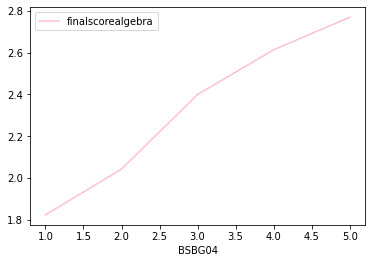


the relation between finalscoredat with BSBG04 : 


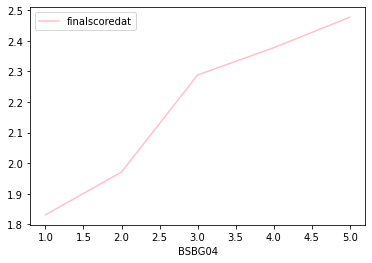


the relation between finalscoregeo with BSBG04 : 


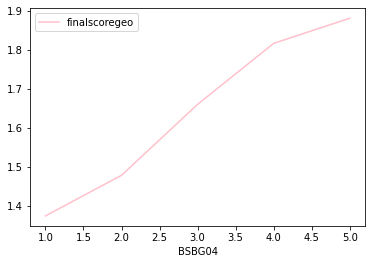


the relation between finalscorenum with BSBG04 : 


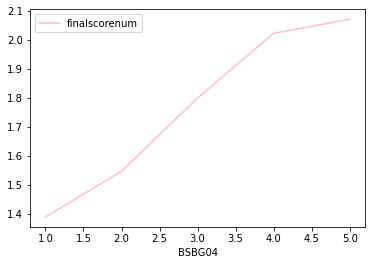

In [147]:
# BSBG04 = AMOUNT OF BOOKS IN YOUR HOME
plot_relation(algebra_df, 'BSBG04', 'finalscorealgebra')
plot_relation(dat_df, 'BSBG04', 'finalscoredat')
plot_relation(geo_df, 'BSBG04', 'finalscoregeo')
plot_relation(num_df, 'BSBG04', 'finalscorenum')


we can compare other features too


the relation between finalscorealgebra with BSBM19H : 


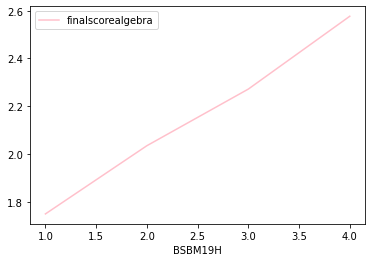


the relation between finalscoredat with BSBM19H : 


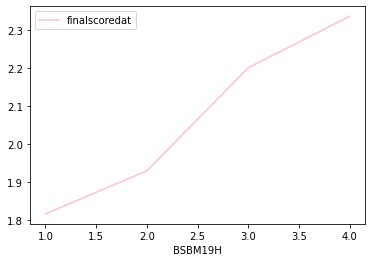


the relation between finalscoregeo with BSBM19H : 


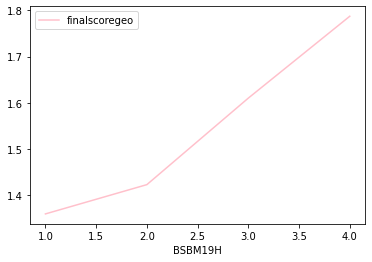


the relation between finalscorenum with BSBM19H : 


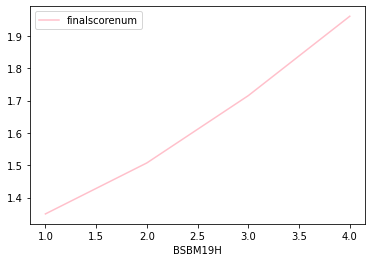

In [150]:
# BSBM19H = MATHEMATICS HARDER FOR ME
# hardly affect

plot_relation(algebra_df, 'BSBM19H', 'finalscorealgebra')
plot_relation(dat_df, 'BSBM19H', 'finalscoredat')
plot_relation(geo_df, 'BSBM19H', 'finalscoregeo')
plot_relation(num_df, 'BSBM19H', 'finalscorenum')



the relation between finalscorealgebra with BSBM19B : 


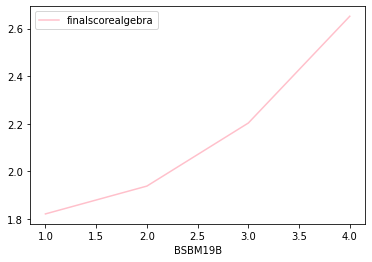


the relation between finalscoredat with BSBM19B : 


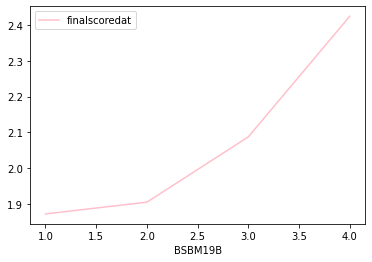


the relation between finalscoregeo with BSBM19B : 


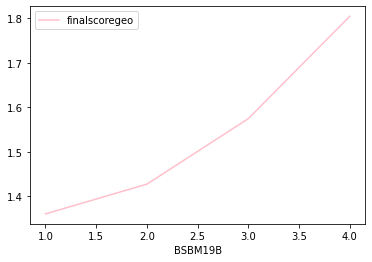


the relation between finalscorenum with BSBM19B : 


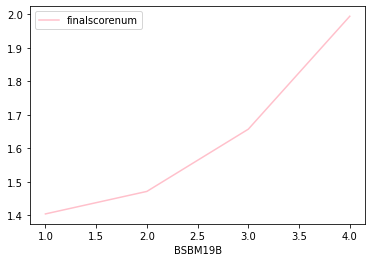

In [158]:
# BSBM19B = MATHEMATICS IS MORE DIFFICULT

plot_relation(algebra_df, 'BSBM19B', 'finalscorealgebra')
plot_relation(dat_df, 'BSBM19B', 'finalscoredat')
plot_relation(geo_df, 'BSBM19B', 'finalscoregeo')
plot_relation(num_df, 'BSBM19B', 'finalscorenum')


we can assume that the context of exam will be kinda affected in some features and not in others.